In [135]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

# Load the data from problem1.csv into a pandas DataFrame
data = pd.read_csv('Problem1.csv', usecols=[0])


print(data)

# Fit a Normal Distribution to the data
mu, std = norm.fit(data)
print("Normal Distribution: mu = {:.2f}, std = {:.2f}".format(mu, std))

# Fit a Generalized T Distribution to the data
df, loc, scale = t.fit(data)
print("Generalized T Distribution: df = {:.2f}, loc = {:.2f}, scale = {:.2f}".format(df, loc, scale))


            x
0   -0.002665
1   -0.045128
2    0.053635
3    0.010450
4   -0.016284
..        ...
495  0.009279
496 -0.001121
497  0.075188
498  0.038520
499 -0.033949

[500 rows x 1 columns]
Normal Distribution: mu = -0.00, std = 0.05
Generalized T Distribution: df = 4.25, loc = -0.00, scale = 0.04


VaR at 95% confidence level: 8.13%
ES at 95% confidence level: 1.43%


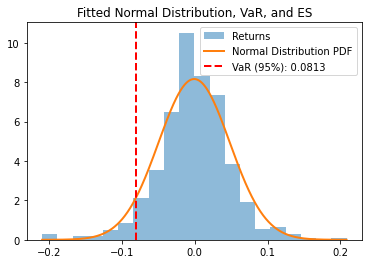

In [136]:
import pandas as pd
import numpy as np
from scipy.stats import norm, percentileofscore
import matplotlib.pyplot as plt



# Step 3: Fit the normal distribution
#mu, sigma = norm.fit(data)
mu = mu
sigma = std
norm_frozen = norm(mu, sigma)



# Step 4: Calculate the VaR and Expected Shortfall
confidence_level = 0.95

# Calculate the VaR using the frozen distribution object
VaR = np.abs(norm_frozen.ppf(1 - confidence_level))

# Calculate the Expected Shortfall using the frozen distribution object
ES = -norm_frozen.expect(lambda x: x, lb=VaR, ub=norm_frozen.mean())

print("VaR at {:.0%} confidence level: {:.2%}".format(conf_level, VaR))
print("ES at {:.0%} confidence level: {:.2%}".format(conf_level, ES))


# Plot the histogram and fitted distribution PDF
plt.hist(data, bins=20, density=True, alpha=0.5, label='Returns')
x = np.linspace(data.min(), data.max(), 1000)
plt.plot(x, norm_frozen.pdf(x), linewidth=2, label='Normal Distribution PDF')

# Plot the VaR and Expected Shortfall as vertical lines
plt.axvline(x=-VaR, color='r', linestyle='--', linewidth=2, label=f'VaR ({confidence_level*100:.0f}%): {VaR:.4f}')

# Set the title and legend
plt.title('Fitted Normal Distribution, VaR, and ES')
plt.legend()

# Show the plot
plt.show()


VaR at 95% confidence level: 7.65%
ES at 95% confidence level: 11.26%


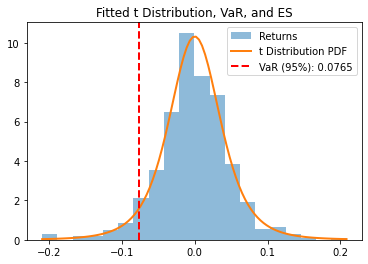

In [137]:
#t distribution
import pandas as pd
import numpy as np
from scipy.stats import t, percentileofscore
import matplotlib.pyplot as plt


# Step 3: Fit the t-distribution
t_frozen = t(df, loc, scale)

# Step 4: Calculate the VaR and Expected Shortfall
confidence_level = 0.95

# Calculate the VaR using the frozen distribution object
VaR = np.abs(t_frozen.ppf(1 - confidence_level))

# Calculate the Expected Shortfall using the frozen distribution object
ES = -t_frozen.expect(lambda x: x, lb=VaR, ub=np.inf) / (1 - confidence_level)

print("VaR at {:.0%} confidence level: {:.2%}".format(conf_level, VaR))
print("ES at {:.0%} confidence level: {:.2%}".format(conf_level, -ES))


# Plot the histogram and fitted distribution PDF
plt.hist(data, bins=20, density=True, alpha=0.5, label='Returns')
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, t_frozen.pdf(x), linewidth=2, label='t Distribution PDF')

# Plot the VaR and Expected Shortfall as vertical lines
plt.axvline(x=-VaR, color='r', linestyle='--', linewidth=2, label=f'VaR ({confidence_level*100:.0f}%): {VaR:.4f}')


# Set the title and legend
plt.title('Fitted t Distribution, VaR, and ES')
plt.legend()

# Show the plot
plt.show()



